# Explore here

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.drop_duplicates().reset_index(drop=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Guardarlo en data

df.to_csv('../data/raw/df_raw.csv', index=False)

In [5]:
#Factorizar variables

for column in df.columns:
    if df[column].dtype == 'object':
        df[column+'_n'] = pd.factorize(df[column])[0]

df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [19]:
# Identificar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print

<function print>

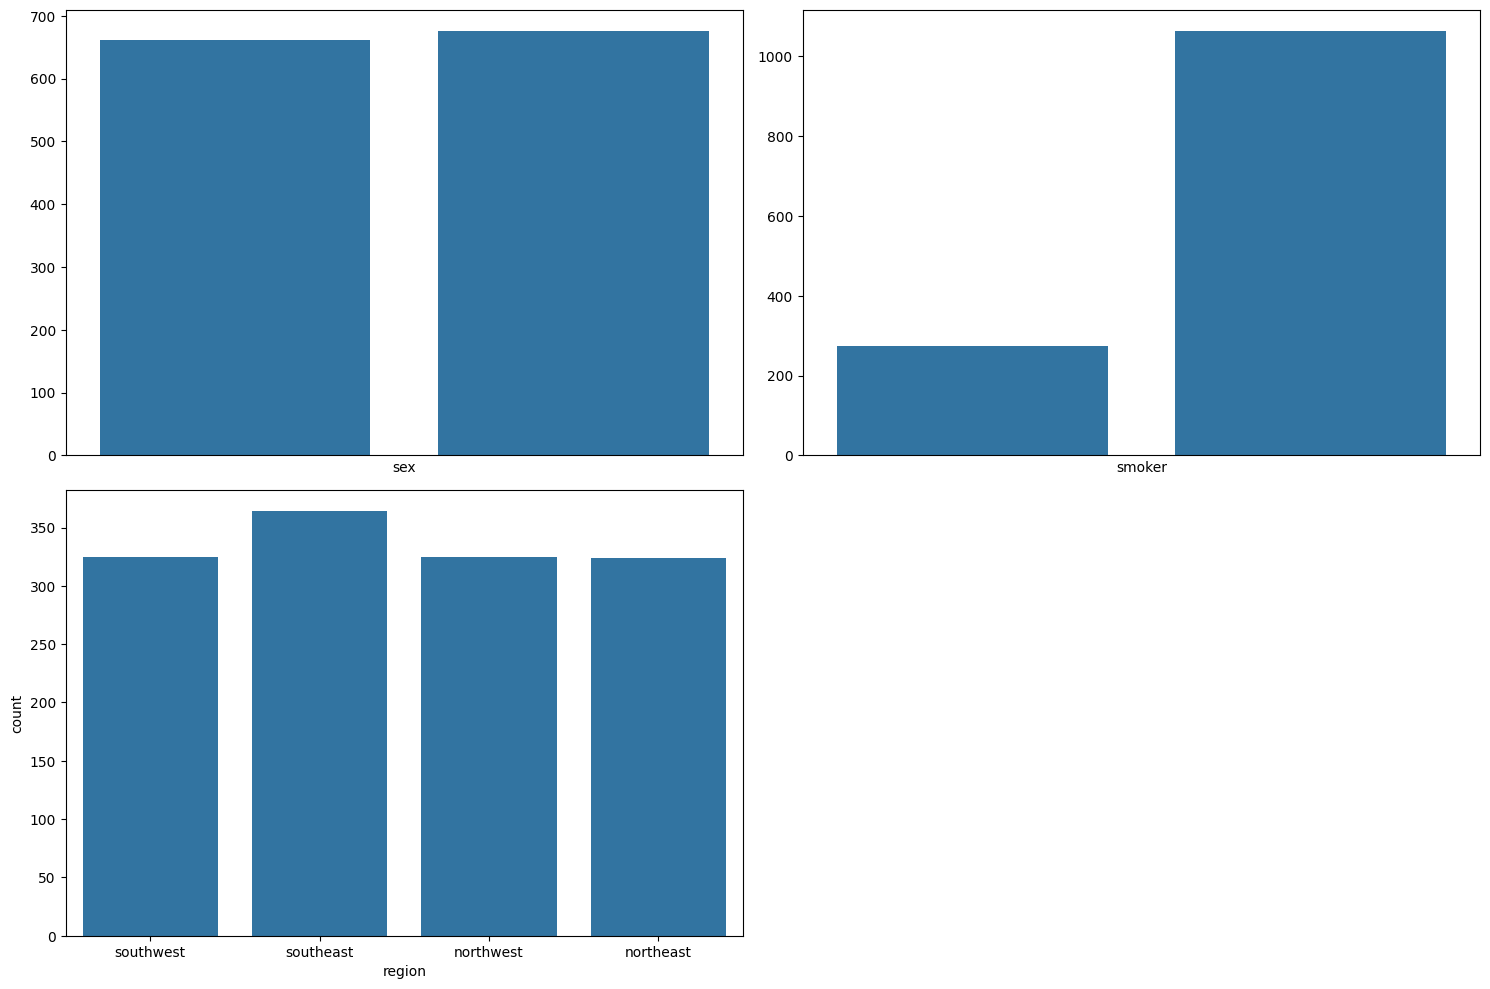

In [21]:

#Analisis Univariante
#Analisis Categorico

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize=(15, 10))  # Ajustado para 3 variables categóricas

# Crear gráficos de barras para cada variable categórica
sns.countplot(ax=axis[0, 0], data=df, x='sex').set(ylabel=None, xticks=[])
sns.countplot(ax=axis[0, 1], data=df, x='smoker').set(ylabel=None, xticks=[])
sns.countplot(ax=axis[1, 0], data=df, x='region')

# Eliminar el subplot vacío en la última posición
fig.delaxes(axis[1, 1])

plt.tight_layout()
plt.show()


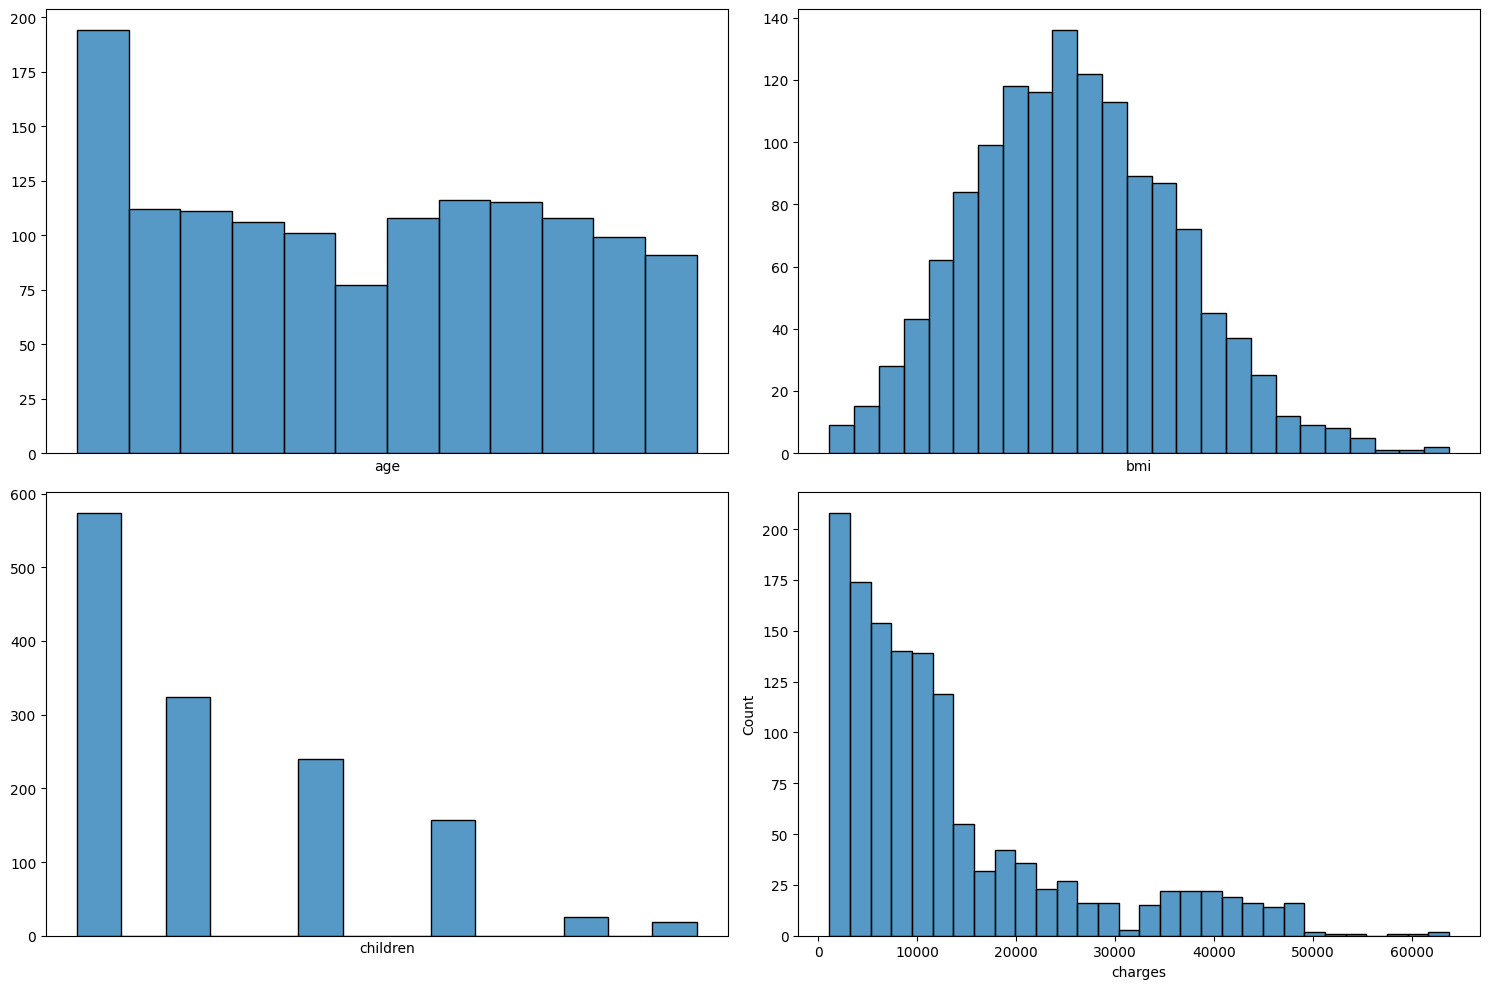

In [22]:


fig, axis = plt.subplots(2, 2, figsize=(15, 10))  # Ajustado para 4 variables numéricas

# Crear histogramas para cada variable numérica
sns.histplot(ax=axis[0, 0], data=df, x='age').set(ylabel=None, xticks=[])
sns.histplot(ax=axis[0, 1], data=df, x='bmi').set(ylabel=None, xticks=[])
sns.histplot(ax=axis[1, 0], data=df, x='children').set(ylabel=None, xticks=[])
sns.histplot(ax=axis[1, 1], data=df, x='charges')

plt.tight_layout()
plt.show()


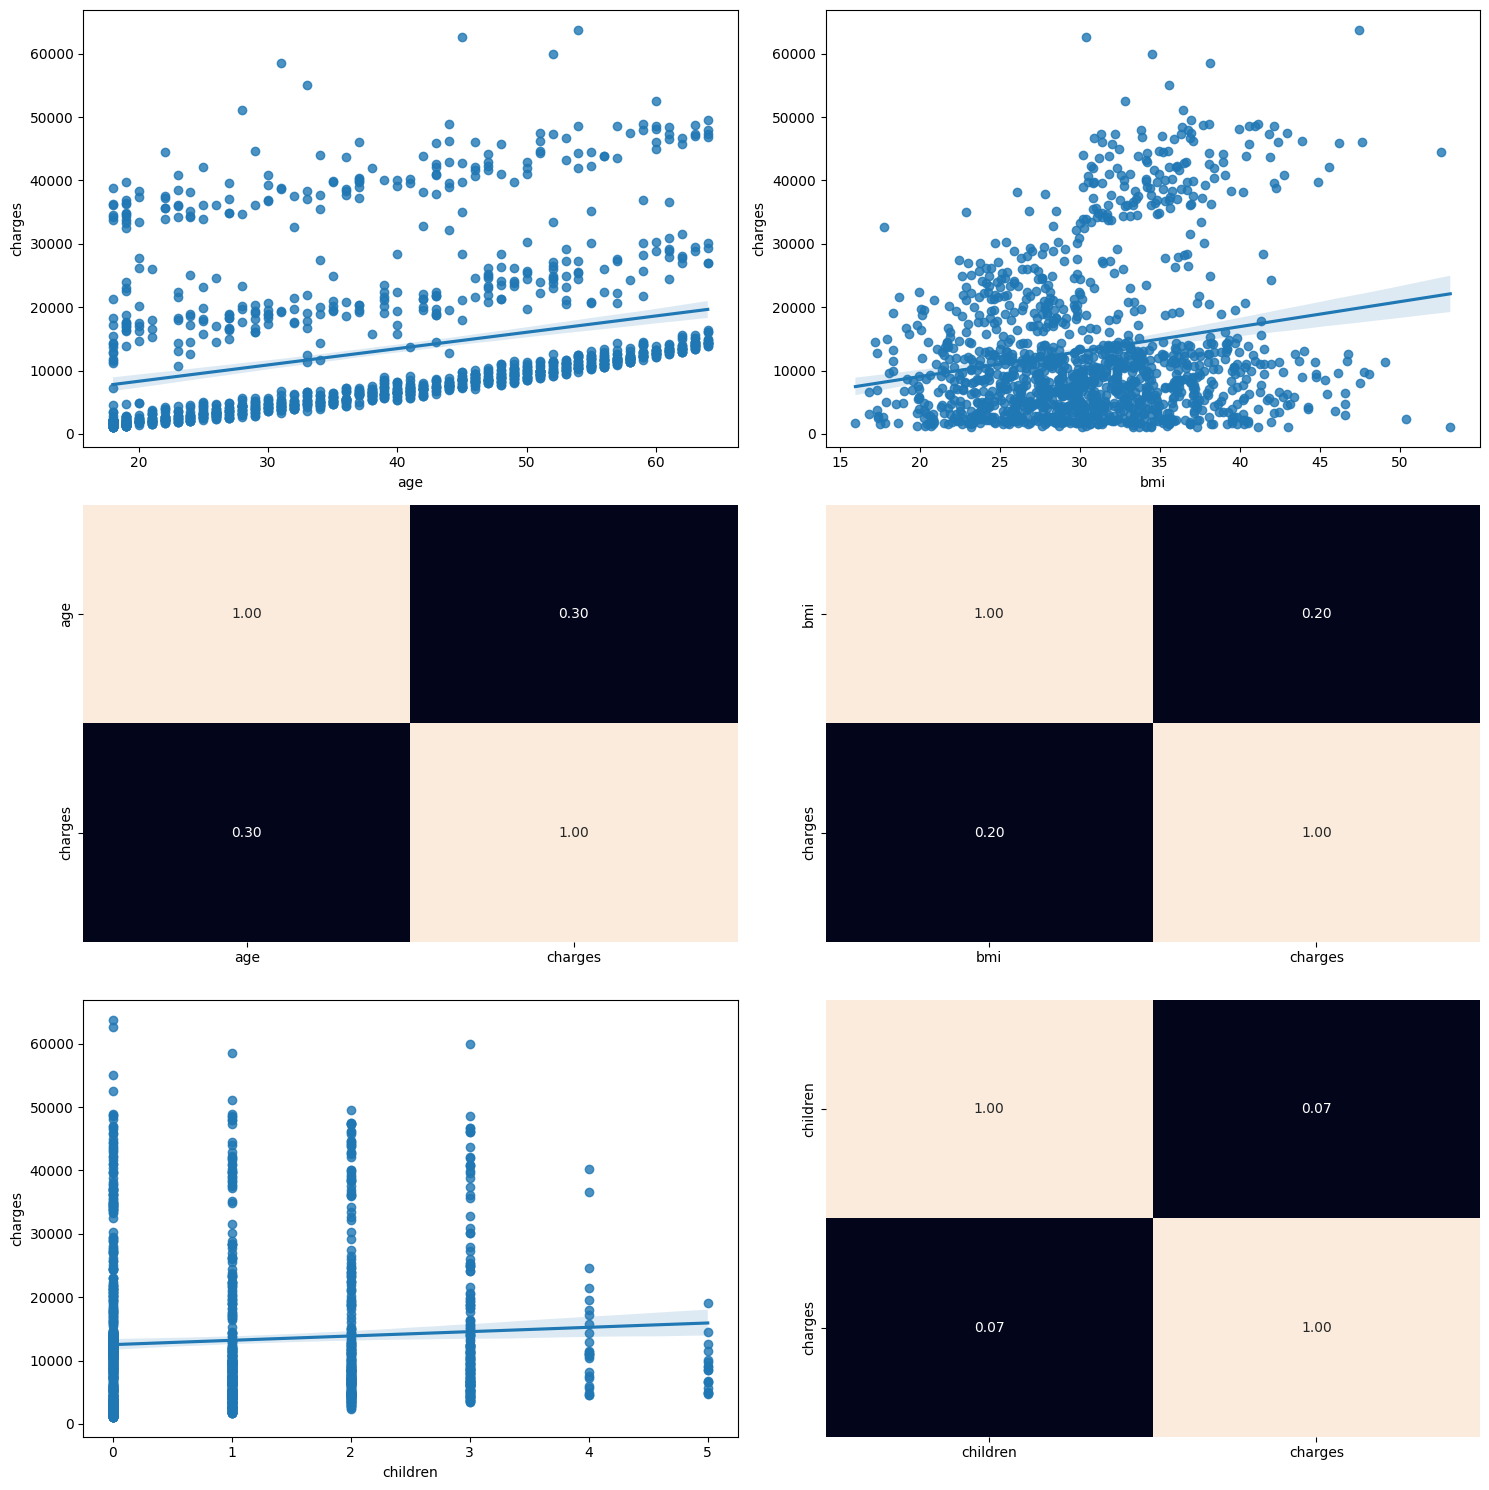

In [23]:
#Analisis Multivariente
#Numerico-Numerico


fig, axis = plt.subplots(3, 2, figsize=(15, 15))  # Ajustado para 3 pares de variables

# Crear gráficos de regresión y heatmaps para pares de variables numéricas
sns.regplot(ax=axis[0, 0], data=df, x='age', y='charges')
sns.heatmap(df[['age', 'charges']].corr(), annot=True, fmt='.2f', ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x='bmi', y='charges')
sns.heatmap(df[['bmi', 'charges']].corr(), annot=True, fmt='.2f', ax=axis[1, 1], cbar=False)

sns.regplot(ax=axis[2, 0], data=df, x='children', y='charges')
sns.heatmap(df[['children', 'charges']].corr(), annot=True, fmt='.2f', ax=axis[2, 1], cbar=False)

# Eliminar subplots vacíos si es necesario
#fig.delaxes(axis[1, 2])  # Eliminar si queda vacío
#fig.delaxes(axis[2, 2])  # Eliminar si queda vacío

plt.tight_layout()
plt.show()


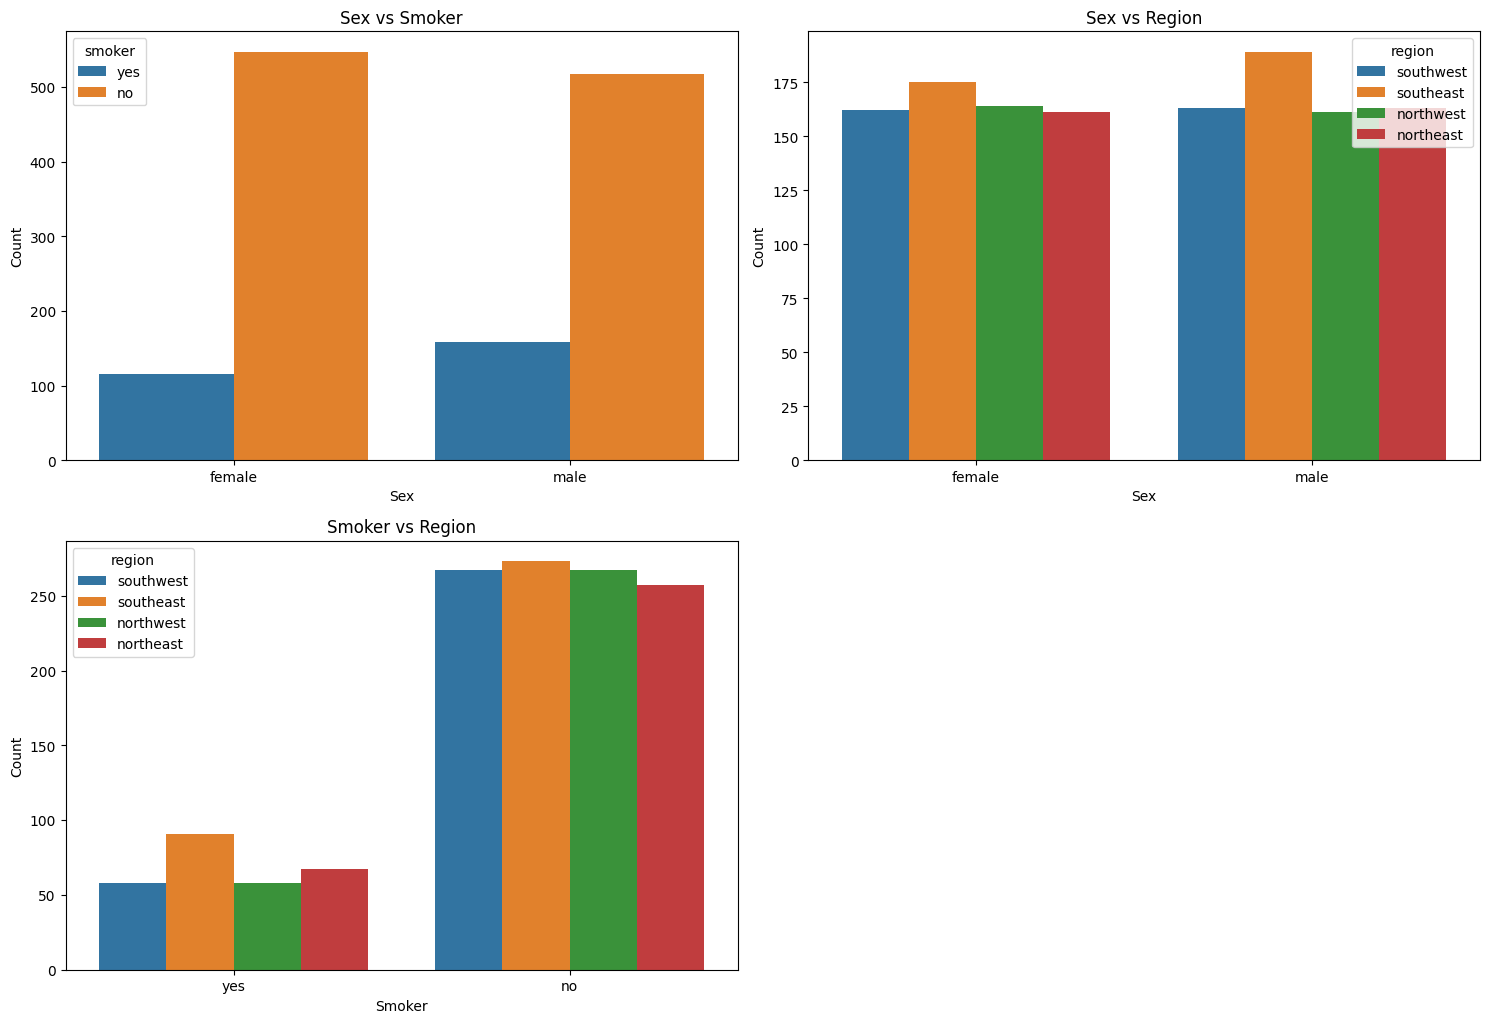

In [25]:
#Analisis categorico -Categorico

fig, axis = plt.subplots(3, 2, figsize=(15, 15))  # Ajustado para 3 pares de variables categóricas

# Crear gráficos de barras para pares de variables categóricas
sns.countplot(ax=axis[0, 0], data=df, x='sex', hue='smoker')
axis[0, 0].set_title('Sex vs Smoker')
axis[0, 0].set_xlabel('Sex')
axis[0, 0].set_ylabel('Count')

sns.countplot(ax=axis[0, 1], data=df, x='sex', hue='region')
axis[0, 1].set_title('Sex vs Region')
axis[0, 1].set_xlabel('Sex')
axis[0, 1].set_ylabel('Count')

sns.countplot(ax=axis[1, 0], data=df, x='smoker', hue='region')
axis[1, 0].set_title('Smoker vs Region')
axis[1, 0].set_xlabel('Smoker')
axis[1, 0].set_ylabel('Count')

# Eliminar subplots vacíos
fig.delaxes(axis[1, 1])  # Eliminar si queda vacío
fig.delaxes(axis[2, 0])  # Eliminar si queda vacío
fig.delaxes(axis[2, 1])  # Eliminar si queda vacío

plt.tight_layout()
plt.show()


<Axes: >

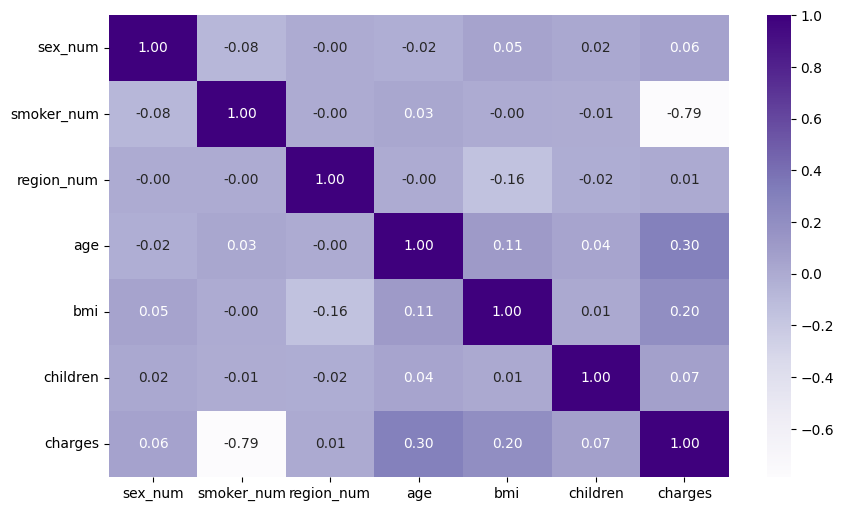

In [27]:
#Analisis numerico -Categorico


# Codificar variables categóricas
df['sex_num'] = pd.factorize(df['sex'])[0]
df['smoker_num'] = pd.factorize(df['smoker'])[0]
df['region_num'] = pd.factorize(df['region'])[0]

# Seleccionar columnas para la matriz de correlación
columnas_correlacion = ['sex_num', 'smoker_num', 'region_num', 'age', 'bmi', 'children', 'charges']

# Crear heatmap de correlación con escala de morados
plt.figure(figsize=(10, 6))
sns.heatmap(df[columnas_correlacion].corr(), annot=True, fmt='.2f', cmap='Purples')

# Mostrar el gráfico



In [28]:
#ingieneria de carcteristicas

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

variables_num = ['age','bmi','children','sex_n', 'smoker_n', 'region_n']

features_escaladas = scaler.fit_transform(df[variables_num])

df_escalado = pd.DataFrame(features_escaladas,index=df.index,columns = variables_num)
df_escalado.head()

,age,bmi,children,sex_n,smoker_n,region_n
0,-1.438764,-0.453320,-0.908614,-1.010519,-1.970587,-1.343905
1,-1.509965,0.509621,-0.078767,0.989591,0.507463,-0.438495
2,-0.797954,0.383307,1.580926,0.989591,0.507463,-0.438495
3,-0.441948,-1.305531,-0.908614,0.989591,0.507463,0.466915
4,-0.513149,-0.292556,-0.908614,0.989591,0.507463,0.466915


In [7]:
df_escalado.describe()

,age,bmi,children,sex_n,smoker_n,region_n
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17,-1.234687e-16,-1.606421e-16,-9.027823e-17
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01,-1.010519e+00,-1.970587e+00,-1.343905e+00
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01,-1.010519e+00,5.074631e-01,-4.384945e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02,9.895908e-01,5.074631e-01,-4.384945e-01
75%,8.396738e-01,6.611572e-01,7.510793e-01,9.895908e-01,5.074631e-01,4.669155e-01
max,1.765289e+00,3.685522e+00,3.240619e+00,9.895908e-01,5.074631e-01,1.372326e+00


In [8]:
from sklearn.model_selection import train_test_split

X= df_escalado
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

X_train

,age,bmi,children,sex_n,smoker_n,region_n
560,0.483668,-1.757474,0.751079,-1.010519,0.507463,0.466915
1285,0.554869,-1.040599,-0.908614,-1.010519,0.507463,1.372326
1142,0.910875,-0.952015,-0.908614,-1.010519,0.507463,-0.438495
969,-0.014740,0.599846,3.240619,-1.010519,0.507463,-0.438495
486,1.053277,-1.508126,1.580926,-1.010519,0.507463,0.466915
...,...,...,...,...,...,...
1095,-1.509965,0.112633,2.410772,-1.010519,0.507463,1.372326
1130,-0.014740,-1.114419,3.240619,-1.010519,0.507463,-0.438495
1294,1.338082,-0.900341,-0.908614,0.989591,0.507463,1.372326
860,-0.157143,2.778356,0.751079,-1.010519,-1.970587,-1.343905


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
print(model.intercept_)
print(model.coef_)

13315.445192139769
[ 3.61028043e+03  2.04689296e+03  5.12253132e+02 -9.39521400e+00
 -9.54291505e+03  2.99625864e+02]


In [11]:
y_pred = model.predict(X_test)
y_pred

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f'R2: {r2_score(y_test,y_pred)}')

MSE: 33635210.43117845
R2: 0.7833463107364536


In [13]:
X_train = X_train[['age','bmi','smoker_n']]
X_test = X_test[['age','bmi','smoker_n']]

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f'R2: {r2_score(y_test,y_pred)}')

MSE: 34512843.880227886
R2: 0.7776932310583375


In [14]:
from pickle import dump

dump(model,open('../models/linear_regression_default.sav','wb'))

In [15]:
len(y_pred)

268

In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 764 to 846
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       268 non-null    float64
 1   bmi       268 non-null    float64
 2   smoker_n  268 non-null    float64
dtypes: float64(3)
memory usage: 8.4 KB
